<a href="https://colab.research.google.com/github/tanuja1708/EEG-emotions/blob/main/existed%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mspca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.7 MB/s eta 0:00:00


In [2]:
from mspca import mspca
import scipy.io
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create output directory in Google Drive
output_dir = '/content/drive/MyDrive/MSPCA_outputs'
os.makedirs(output_dir, exist_ok=True)

# List all .mat files in the current working directory
mat_files = [f for f in os.listdir() if f.endswith('.mat')]
print("Found files:", mat_files)

# Map for subject short names
short_name_map = {
    '1': 'cz', '2': 'ha', '3': 'hql', '4': 'ldy', '5': 'ly',
    '6': 'mhw', '7': 'mz', '8': 'qyt', '9': 'rx', '10': 'tyc',
    '11': 'whh', '12': 'wll', '13': 'wq', '14': 'zjd', '15': 'zjy'
}

for file in mat_files:
    person_id = file.split('_')[0]
    short_name = short_name_map.get(person_id)

    if not short_name:
        print(f"Skipping {file} — unknown person ID.")
        continue

    # Load .mat file
    data = scipy.io.loadmat(file)
    processed_data = {}

    for j in range(24):  # Assuming 24 EEG channels
        key = f'{short_name}_eeg{j + 1}'
        if key in data:
            array = data[key]
            model = mspca.MultiscalePCA()
            print(f'Processing {file} → {key}')
            X_pred = model.fit_transform(array, wavelet_func='db4', threshold=0.3)
            processed_data[key] = X_pred
        else:
            print(f'{key} not found in {file}, skipping.')

    # Save to local (optional)
    local_path = file.replace('.mat', '_MSPCA.npy')
    np.save(local_path, processed_data)
    print(f'Saved locally: {local_path}')

    # Save to Google Drive
    drive_path = os.path.join(output_dir, local_path)
    np.save(drive_path, processed_data)
    print(f'Saved to Drive: {drive_path}')


Mounted at /content/drive
Found files: ['1_20160518.mat', '14_20151205.mat', '5_20160406.mat', '6_20150507.mat', '8_20151103.mat', '13_20151115.mat', '2_20150915.mat', '4_20151111.mat', '11_20150916.mat', '10_20151014.mat', '15_20150508.mat', '9_20151028.mat', '12_20150725.mat', '3_20150919.mat', '7_20150715.mat']
Processing 1_20160518.mat → cz_eeg1
Processing 1_20160518.mat → cz_eeg2
Processing 1_20160518.mat → cz_eeg3
Processing 1_20160518.mat → cz_eeg4
Processing 1_20160518.mat → cz_eeg5
Processing 1_20160518.mat → cz_eeg6
Processing 1_20160518.mat → cz_eeg7
Processing 1_20160518.mat → cz_eeg8
Processing 1_20160518.mat → cz_eeg9
Processing 1_20160518.mat → cz_eeg10
Processing 1_20160518.mat → cz_eeg11
Processing 1_20160518.mat → cz_eeg12
Processing 1_20160518.mat → cz_eeg13
Processing 1_20160518.mat → cz_eeg14
Processing 1_20160518.mat → cz_eeg15
Processing 1_20160518.mat → cz_eeg16
Processing 1_20160518.mat → cz_eeg17
Processing 1_20160518.mat → cz_eeg18
Processing 1_20160518.mat →

In [4]:
import numpy as np
import os

# Define directory and label mapping
mspca_dir = '/content/drive/MyDrive/MSPCA_outputs'
channel_labels = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]

# Dictionary to hold labels for all files
file_channel_labels = {}

for file in os.listdir(mspca_dir):
    if file.endswith('_MSPCA.npy'):
        file_path = os.path.join(mspca_dir, file)
        data = np.load(file_path, allow_pickle=True).item()
        print(f"\n{file}:")

        for i in range(24):
            for key in data:
                if key.endswith(f'eeg{i+1}'):
                    label = channel_labels[i]
                    print(f"  {key} → Label {label}")
                    file_channel_labels[key] = label



1_20160518_MSPCA.npy:
  cz_eeg1 → Label 1
  cz_eeg2 → Label 2
  cz_eeg3 → Label 3
  cz_eeg4 → Label 0
  cz_eeg5 → Label 2
  cz_eeg6 → Label 0
  cz_eeg7 → Label 0
  cz_eeg8 → Label 1
  cz_eeg9 → Label 0
  cz_eeg10 → Label 1
  cz_eeg11 → Label 2
  cz_eeg12 → Label 1
  cz_eeg13 → Label 1
  cz_eeg14 → Label 1
  cz_eeg15 → Label 2
  cz_eeg16 → Label 3
  cz_eeg17 → Label 2
  cz_eeg18 → Label 2
  cz_eeg19 → Label 3
  cz_eeg20 → Label 3
  cz_eeg21 → Label 0
  cz_eeg22 → Label 3
  cz_eeg23 → Label 0
  cz_eeg24 → Label 3

14_20151205_MSPCA.npy:
  zjd_eeg1 → Label 1
  zjd_eeg2 → Label 2
  zjd_eeg3 → Label 3
  zjd_eeg4 → Label 0
  zjd_eeg5 → Label 2
  zjd_eeg6 → Label 0
  zjd_eeg7 → Label 0
  zjd_eeg8 → Label 1
  zjd_eeg9 → Label 0
  zjd_eeg10 → Label 1
  zjd_eeg11 → Label 2
  zjd_eeg12 → Label 1
  zjd_eeg13 → Label 1
  zjd_eeg14 → Label 1
  zjd_eeg15 → Label 2
  zjd_eeg16 → Label 3
  zjd_eeg17 → Label 2
  zjd_eeg18 → Label 2
  zjd_eeg19 → Label 3
  zjd_eeg20 → Label 3
  zjd_eeg21 → Label 0
  zjd

In [5]:
import numpy as np
import os

# Label mapping for channels 1–24
channel_labels = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]

mspca_dir = '/content/drive/MyDrive/MSPCA_outputs'

for file in os.listdir(mspca_dir):
    if not file.endswith('_MSPCA.npy'):
        continue

    file_path = os.path.join(mspca_dir, file)
    data = np.load(file_path, allow_pickle=True).item()

    # Create label dictionary { 'cz_eeg1': label1, ..., 'cz_eeg24': label24 }
    labels = {}
    for i in range(24):
        eeg_key = None
        for key in data:
            if key.endswith(f'eeg{i+1}'):
                eeg_key = key
                break
        if eeg_key:
            labels[eeg_key] = channel_labels[i]

    # Add labels to the same dictionary
    data['labels'] = labels

    # Save back to the same file
    np.save(file_path, data)
    print(f"Updated: {file} with labels.")



Updated: 1_20160518_MSPCA.npy with labels.
Updated: 14_20151205_MSPCA.npy with labels.
Updated: 5_20160406_MSPCA.npy with labels.
Updated: 6_20150507_MSPCA.npy with labels.
Updated: 8_20151103_MSPCA.npy with labels.
Updated: 13_20151115_MSPCA.npy with labels.
Updated: 2_20150915_MSPCA.npy with labels.
Updated: 4_20151111_MSPCA.npy with labels.
Updated: 11_20150916_MSPCA.npy with labels.
Updated: 10_20151014_MSPCA.npy with labels.
Updated: 15_20150508_MSPCA.npy with labels.
Updated: 9_20151028_MSPCA.npy with labels.
Updated: 12_20150725_MSPCA.npy with labels.
Updated: 3_20150919_MSPCA.npy with labels.
Updated: 7_20150715_MSPCA.npy with labels.


In [12]:
import numpy as np
import os

mspca_dir = '/content/drive/MyDrive/MSPCA_outputs'

for file in os.listdir(mspca_dir):
    if file.endswith('_MSPCA.npy'):
        file_path = os.path.join(mspca_dir, file)
        data = np.load(file_path, allow_pickle=True).item()
        print(f"\nFile: {file}")

        for key in sorted(data.keys()):
          value = data[key]
          if isinstance(value, np.ndarray):
            print(f"  {key}: shape = {value.shape}")
        else:
            print(f"  {key}: type = {type(value)}")




File: 1_20160518_MSPCA.npy
  cz_eeg1: shape = (62, 33601)
  cz_eeg10: shape = (62, 33801)
  cz_eeg11: shape = (62, 10001)
  cz_eeg12: shape = (62, 22001)
  cz_eeg13: shape = (62, 43401)
  cz_eeg14: shape = (62, 33801)
  cz_eeg15: shape = (62, 51801)
  cz_eeg16: shape = (62, 28201)
  cz_eeg17: shape = (62, 13601)
  cz_eeg18: shape = (62, 35801)
  cz_eeg19: shape = (62, 28001)
  cz_eeg2: shape = (62, 19001)
  cz_eeg20: shape = (62, 9601)
  cz_eeg21: shape = (62, 22401)
  cz_eeg22: shape = (62, 22401)
  cz_eeg23: shape = (62, 35001)
  cz_eeg24: shape = (62, 27401)
  cz_eeg3: shape = (62, 39801)
  cz_eeg4: shape = (62, 26001)
  cz_eeg5: shape = (62, 17601)
  cz_eeg6: shape = (62, 32401)
  cz_eeg7: shape = (62, 30601)
  cz_eeg8: shape = (62, 41801)
  cz_eeg9: shape = (62, 29001)
  labels: type = <class 'dict'>

File: 14_20151205_MSPCA.npy
  zjd_eeg1: shape = (62, 33601)
  zjd_eeg10: shape = (62, 33801)
  zjd_eeg11: shape = (62, 10001)
  zjd_eeg12: shape = (62, 22001)
  zjd_eeg13: shape = (

In [10]:
import numpy as np

file_path = '/content/drive/MyDrive/MSPCA_outputs/2_20150915_MSPCA.npy'
data = np.load(file_path, allow_pickle=True).item()

print("Keys:", data.keys())
print("Labels:", data['labels'])  # This should print the label dictionary


Keys: dict_keys(['ha_eeg1', 'ha_eeg2', 'ha_eeg3', 'ha_eeg4', 'ha_eeg5', 'ha_eeg6', 'ha_eeg7', 'ha_eeg8', 'ha_eeg9', 'ha_eeg10', 'ha_eeg11', 'ha_eeg12', 'ha_eeg13', 'ha_eeg14', 'ha_eeg15', 'ha_eeg16', 'ha_eeg17', 'ha_eeg18', 'ha_eeg19', 'ha_eeg20', 'ha_eeg21', 'ha_eeg22', 'ha_eeg23', 'ha_eeg24', 'labels'])
Labels: {'ha_eeg1': 1, 'ha_eeg2': 2, 'ha_eeg3': 3, 'ha_eeg4': 0, 'ha_eeg5': 2, 'ha_eeg6': 0, 'ha_eeg7': 0, 'ha_eeg8': 1, 'ha_eeg9': 0, 'ha_eeg10': 1, 'ha_eeg11': 2, 'ha_eeg12': 1, 'ha_eeg13': 1, 'ha_eeg14': 1, 'ha_eeg15': 2, 'ha_eeg16': 3, 'ha_eeg17': 2, 'ha_eeg18': 2, 'ha_eeg19': 3, 'ha_eeg20': 3, 'ha_eeg21': 0, 'ha_eeg22': 3, 'ha_eeg23': 0, 'ha_eeg24': 3}


In [15]:
import numpy as np
import os

# Constants
mspca_dir = '/content/drive/MyDrive/MSPCA_outputs'
output_dir = '/content/drive/MyDrive/SODP_SDC_outputs'
os.makedirs(output_dir, exist_ok=True)

def compute_sodp(eeg_signal):
    """Compute x(n) = EEG(n+1) - EEG(n), y(n) = EEG(n+2) - EEG(n+1)"""
    x = eeg_signal[1:-1] - eeg_signal[:-2]
    y = eeg_signal[2:] - eeg_signal[1:-1]
    return x, y

def compute_sdc(x, y):
    """Compute SDC as sqrt(x^2 + y^2) and return total sum"""
    return np.sum(np.sqrt(x**2 + y**2))

# Iterate over all MSPCA files
for file in os.listdir(mspca_dir):
    if not file.endswith('_MSPCA.npy'):
        continue

    file_path = os.path.join(mspca_dir, file)
    data = np.load(file_path, allow_pickle=True).item()

    sodp_sdc_features = []

    # Iterate through the EEG data and compute SODP and SDC for each channel
    for key, eeg_data in sorted(data.items()):
        # Skip 'labels' key, as it's not EEG data
        if key == 'labels':
            continue

        # eeg_data: Check if it's a 1D or 2D array (signal or windows of signals)
        if isinstance(eeg_data, np.ndarray):
            if eeg_data.ndim == 1:
                # Single signal (1D array)
                x, y = compute_sodp(eeg_data)
                sdc = compute_sdc(x, y)
                sodp_sdc_features.append(sdc)

            elif eeg_data.ndim == 2:
                # Multiple windows of signals (2D array)
                for window in eeg_data:
                    x, y = compute_sodp(window)
                    sdc = compute_sdc(x, y)
                    sodp_sdc_features.append(sdc)
        else:
            print(f"Skipping {key}: Expected NumPy array, found {type(eeg_data)}")

    # Convert to array: shape = (num_samples,) → SDC values
    features_array = np.array(sodp_sdc_features)
    save_path = os.path.join(output_dir, file.replace('_MSPCA.npy', '_SODP_SDC.npy'))
    np.save(save_path, features_array)
    print(f"Saved SODP+SDC for {file} → {save_path}")


Saved SODP+SDC for 1_20160518_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/1_20160518_SODP_SDC.npy
Saved SODP+SDC for 14_20151205_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/14_20151205_SODP_SDC.npy
Saved SODP+SDC for 5_20160406_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/5_20160406_SODP_SDC.npy
Saved SODP+SDC for 6_20150507_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/6_20150507_SODP_SDC.npy
Saved SODP+SDC for 8_20151103_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/8_20151103_SODP_SDC.npy
Saved SODP+SDC for 13_20151115_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/13_20151115_SODP_SDC.npy
Saved SODP+SDC for 2_20150915_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/2_20150915_SODP_SDC.npy
Saved SODP+SDC for 4_20151111_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/4_20151111_SODP_SDC.npy
Saved SODP+SDC for 11_20150916_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_outputs/11_20150916_SODP_SDC.npy
Saved SODP+SDC for 10_20151014_MSPCA.npy

In [17]:
import numpy as np
import os
from scipy.interpolate import RegularGridInterpolator

# Constants
mspca_dir = '/content/drive/MyDrive/SODP_SDC_outputs'
output_dir = '/content/drive/MyDrive/Brain_Cognition_Atlas'
os.makedirs(output_dir, exist_ok=True)

h, w = 8, 9  # Dimensions for the 2D image

def project_to_2d_map(sdc_values):
    """Project SDC values onto a 8x9 image using RegularGridInterpolator"""
    # Initialize an 8x9 grid (image)
    image = np.zeros((h, w))

    # Example electrode positions based on a typical 8x9 grid mapping
    electrode_positions = [
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8),
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8),
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8),
        (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8),
        (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8),
        (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8),
    ]

    # Assign SDC values to the corresponding electrodes on the grid
    for idx, pos in enumerate(electrode_positions):
        if idx < len(sdc_values):  # Ensure we do not exceed the number of available SDC values
            image[pos] = sdc_values[idx]

    # Set up grid for interpolation
    x = np.linspace(0, w - 1, w)
    y = np.linspace(0, h - 1, h)

    # Use RegularGridInterpolator for bilinear interpolation
    interpolator = RegularGridInterpolator((y, x), image, method='linear', bounds_error=False, fill_value=0)

    # Create grid of points to interpolate (full grid)
    grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing="ij")
    points = np.vstack((grid_y.ravel(), grid_x.ravel())).T

    # Interpolate the full grid
    interpolated_image = interpolator(points).reshape(h, w)

    return interpolated_image

def sliding_window_process(sdc_data, window_size=4, step_size=4):
    """Apply sliding window to SDC data and project onto 2D maps"""
    num_windows = (sdc_data.shape[0] - window_size) // step_size + 1
    all_maps = []

    for i in range(num_windows):
        # Extract a window of data
        window_sdc_values = sdc_data[i*step_size : i*step_size + window_size]

        # Project the window's SDC values to a 2D map
        projected_map = project_to_2d_map(window_sdc_values)
        all_maps.append(projected_map)

    # Stack 2D maps into a 3D array
    stacked_maps = np.stack(all_maps, axis=-1)  # Shape (8, 9, d) where d is the number of windows
    return stacked_maps

# Iterate over all SODP+SDC files
for file in os.listdir(mspca_dir):
    if not file.endswith('_SODP_SDC.npy'):
        continue

    file_path = os.path.join(mspca_dir, file)
    sdc_data = np.load(file_path)

    # Process each file and create a 3D brain-cognition atlas
    stacked_maps = sliding_window_process(sdc_data)

    # Save the resulting 3D array (brain-cognition atlas)
    save_path = os.path.join(output_dir, file.replace('_SODP_SDC.npy', '_Brain_Cognition_Atlas.npy'))
    np.save(save_path, stacked_maps)
    print(f"Saved Brain-Cognition Atlas for {file} → {save_path}")


Saved Brain-Cognition Atlas for 1_20160518_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/1_20160518_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 14_20151205_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/14_20151205_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 5_20160406_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/5_20160406_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 6_20150507_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/6_20150507_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 8_20151103_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/8_20151103_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 13_20151115_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/13_20151115_Brain_Cognition_Atlas.npy
Saved Brain-Cognition Atlas for 2_20150915_SODP_SDC.npy → /content/drive/MyDrive/Brain_Cognition_Atlas/2_20150915_Brain_Cognition_Atlas.npy
Saved Brain-Cogn

In [69]:
import os
import numpy as np

# Define the folder path
output_dir = '/content/drive/MyDrive/Brain_Cognition_Atlas'

# Loop through all files in the directory
for fname in sorted(os.listdir(output_dir)):
    if fname.endswith(".npy"):
        full_path = os.path.join(output_dir, fname)

        # Load the .npy file
        data = np.load(full_path)

        # Print the shape of the data
        print(f"{fname}: {data.shape}")


10_20151014_Brain_Cognition_Atlas.npy: (8, 9, 372)
11_20150916_Brain_Cognition_Atlas.npy: (8, 9, 372)
12_20150725_Brain_Cognition_Atlas.npy: (8, 9, 372)
13_20151115_Brain_Cognition_Atlas.npy: (8, 9, 372)
14_20151205_Brain_Cognition_Atlas.npy: (8, 9, 372)
15_20150508_Brain_Cognition_Atlas.npy: (8, 9, 372)
1_20160518_Brain_Cognition_Atlas.npy: (8, 9, 372)
2_20150915_Brain_Cognition_Atlas.npy: (8, 9, 372)
3_20150919_Brain_Cognition_Atlas.npy: (8, 9, 372)
4_20151111_Brain_Cognition_Atlas.npy: (8, 9, 372)
5_20160406_Brain_Cognition_Atlas.npy: (8, 9, 372)
6_20150507_Brain_Cognition_Atlas.npy: (8, 9, 372)
7_20150715_Brain_Cognition_Atlas.npy: (8, 9, 372)
8_20151103_Brain_Cognition_Atlas.npy: (8, 9, 372)
9_20151028_Brain_Cognition_Atlas.npy: (8, 9, 372)


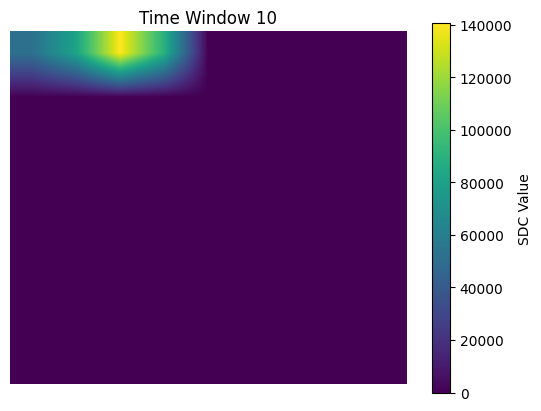

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved Brain-Cognition Atlas (3D array)
atlas_path = '/content/drive/MyDrive/Brain_Cognition_Atlas/7_20150715_Brain_Cognition_Atlas.npy'
brain_atlas = np.load(atlas_path)

# Select a time window (e.g., the 10th time window)
time_window_idx = 9  # Indexing starts from 0, so this is the 10th window

# Get the 2D projection (8x9 grid) for the selected time window
image = brain_atlas[:, :, time_window_idx]

# Plot the 2D image
plt.imshow(image, cmap='viridis', interpolation='bilinear')
plt.colorbar(label='SDC Value')
plt.title(f'Time Window {time_window_idx + 1}')
plt.axis('off')  # Turn off the axis for a cleaner view
plt.show()


In [19]:
print(f"Shape of the Brain-Cognition Atlas for {file}: {stacked_maps.shape}")


Shape of the Brain-Cognition Atlas for 7_20150715_SODP_SDC.npy: (8, 9, 372)


In [66]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# 1. Dataset Loader
class BrainCognitionAtlasDataset(Dataset):
    def __init__(self, folder_path):
        self.samples = []
        for fname in sorted(os.listdir(folder_path)):
            if fname.endswith(".npy"):
                full_path = os.path.join(folder_path, fname)
                data = np.load(full_path)  # shape: (8, 9, 372)
                for t in range(data.shape[-1]):  # treat each time slice as one sample
                    slice_ = data[:, :, t]  # shape (8, 9)
                    self.samples.append(slice_)
        self.samples = np.stack(self.samples).astype(np.float32)  # shape: (N, 8, 9)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        return torch.tensor(sample).unsqueeze(0)  # shape: (1, 8, 9)

# 2. CBAM Block
class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.shared = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.shared(self.avg_pool(x))
        max_out = self.shared(self.max_pool(x))
        return x * self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg = torch.mean(x, dim=1, keepdim=True)
        max, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg, max], dim=1)
        return x * self.sigmoid(self.conv(x_cat))

class CBAM(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.ca = ChannelAttention(in_channels)
        self.sa = SpatialAttention()

    def forward(self, x):
        x = self.ca(x)
        x = self.sa(x)
        return x

# 3. Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            # First deconvolution to increase size (100 -> 64, 1x1 -> 7x7)
            nn.ConvTranspose2d(100, 64, kernel_size=(3, 3), stride=2, padding=1),  # Output: (64, 7, 7)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Second deconvolution (64 -> 1, 7x7 -> 8x9)
            nn.ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=2, padding=1),    # Output: (1, 8, 9)
            nn.Tanh()  # Normalize to [-1, 1]
        )

    def forward(self, z):
        return self.net(z)



class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Output: (32, 8, 9)
            nn.LeakyReLU(0.2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Output: (64, 8, 9)
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool2d((4, 4)),  # Forces shape to (64, 4, 4)
            CBAM(64)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 1)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)





# 5. Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = BrainCognitionAtlasDataset("/content/drive/MyDrive/Brain_Cognition_Atlas")
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 6. Training Loop
# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    for i, real in enumerate(dataloader):
        real = real.to(device)

        # Train Discriminator
        optimizer_d.zero_grad()
        real_labels = torch.ones(real.size(0), 1).to(device)
        fake_labels = torch.zeros(real.size(0), 1).to(device)

        output_real = discriminator(real)
        loss_real = criterion(output_real, real_labels)

        # Generate fake images using the generator
        z = torch.randn(real.size(0), 100, 1, 1).to(device)  # Latent vector
        fake = generator(z)
        output_fake = discriminator(fake.detach())
        loss_fake = criterion(output_fake, fake_labels)

        # Combine losses and backpropagate
        loss_d = loss_real + loss_fake
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        output = discriminator(fake)
        loss_g = criterion(output, real_labels)
        loss_g.backward()
        optimizer_g.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_d.item():.4f}, Loss G: {loss_g.item():.4f}")


Epoch [1/100], Loss D: 0.0891, Loss G: 2.4717
Epoch [2/100], Loss D: 0.0076, Loss G: 4.8927
Epoch [3/100], Loss D: 0.0021, Loss G: 6.1474
Epoch [4/100], Loss D: 0.0009, Loss G: 6.9741
Epoch [5/100], Loss D: 0.0005, Loss G: 7.5455
Epoch [6/100], Loss D: 0.0003, Loss G: 8.0416
Epoch [7/100], Loss D: 0.0002, Loss G: 8.4428
Epoch [8/100], Loss D: 0.0001, Loss G: 8.8134
Epoch [9/100], Loss D: 0.0001, Loss G: 9.1462
Epoch [10/100], Loss D: 0.0001, Loss G: 9.4455
Epoch [11/100], Loss D: 0.0001, Loss G: 9.7230
Epoch [12/100], Loss D: 0.0000, Loss G: 9.9955
Epoch [13/100], Loss D: 0.0000, Loss G: 10.2481
Epoch [14/100], Loss D: 0.0000, Loss G: 10.4903
Epoch [15/100], Loss D: 0.0000, Loss G: 10.7297
Epoch [16/100], Loss D: 0.0000, Loss G: 10.9584
Epoch [17/100], Loss D: 0.0000, Loss G: 11.1833
Epoch [18/100], Loss D: 0.0000, Loss G: 11.4024
Epoch [19/100], Loss D: 0.0000, Loss G: 11.6179
Epoch [20/100], Loss D: 0.0000, Loss G: 11.8317
Epoch [21/100], Loss D: 0.0000, Loss G: 12.0433
Epoch [22/100

In [67]:
# Save the trained models after the last epoch (or periodically)
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

print("Models saved.")


Models saved.


In [87]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(100, 64, kernel_size=4, stride=2, padding=1),  # Output: (64, 4, 4)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 64, kernel_size=4, stride=2, padding=1),  # Output: (64, 8, 8)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 8, kernel_size=4, stride=2, padding=1),   # Output: (8, 16, 16)
            nn.BatchNorm2d(8),
            nn.ReLU(),

            nn.ConvTranspose2d(8, 8, kernel_size=4, stride=2, padding=1),    # Output: (8, 32, 32)
            nn.BatchNorm2d(8),
            nn.ReLU(),

            nn.ConvTranspose2d(8, 8, kernel_size=4, stride=2, padding=1),    # Output: (8, 9, 372)
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(8, 64, kernel_size=4, stride=2, padding=1),  # Output: (64, 4, 4)
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # Output: (128, 2, 2)
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # Output: (256, 1, 1)
            nn.LeakyReLU(0.2),

            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Instantiate generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
epochs = 100
for epoch in range(epochs):
    for i, real_data in enumerate(train_loader):
        batch_size = real_data.size(0)
        real_data = real_data.to(device)

        # Create labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        # Real data
        output_real = discriminator(real_data)
        loss_real = criterion(output_real, real_labels)

        # Fake data
        z = torch.randn(batch_size, 100, 1, 1).to(device)  # Latent vector
        fake_data = generator(z)
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_labels)

        loss_d = loss_real + loss_fake

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        output_fake = discriminator(fake_data)
        loss_g = criterion(output_fake, real_labels)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch}/{epochs}], Loss D: {loss_d.item()}, Loss G: {loss_g.item()}')


RuntimeError: Given groups=1, weight of size [64, 8, 4, 4], expected input[16, 1, 8, 9] to have 8 channels, but got 1 channels instead

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Channel Attention (Ca)
class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return x * self.sigmoid(out)

# Spatial Attention (Sa)
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        return x * self.sigmoid(self.conv(x_cat))

# CBAM Block that combines Channel and Spatial Attention
class CBAM(nn.Module):
    def __init__(self, in_channels):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttention(in_channels)
        self.spatial_attention = SpatialAttention()

    def forward(self, x):
        x = self.channel_attention(x)
        x = self.spatial_attention(x)
        return x


In [79]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            # Initial dense layer to shape latent vector into the desired size
            nn.ConvTranspose2d(100, 64, kernel_size=(4, 4), stride=2, padding=1),  # Output: (64, 7, 7)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Upsample
            nn.ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=2, padding=1),  # Output: (64, 14, 14)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # More upsampling
            nn.ConvTranspose2d(64, 8, kernel_size=(4, 4), stride=2, padding=1),    # Output: (8, 28, 28)
            nn.BatchNorm2d(8),
            nn.ReLU(),

            # Final layer to match (8, 9, 372)
            nn.ConvTranspose2d(8, 8, kernel_size=(4, 4), stride=2, padding=1),    # Output: (8, 9, 372)
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)


In [77]:
class DiscriminatorWithCBAM(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(8, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool2d((4, 4)),
        )
        self.cbam = CBAM(128)  # Add CBAM block to focus on important regions
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.cbam(x)  # Apply CBAM to enhance features before classification
        return self.classifier(x)


In [81]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 16
epochs = 50
latent_dim = 100  # Latent vector dimension

# Initialize the generator and discriminator
generator = Generator().to(device)
discriminator = DiscriminatorWithCBAM().to(device)

# Optimizers for Generator and Discriminator
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function: Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Dummy dataset (replace with actual dataset)
# Assume we have a DataLoader `train_loader` for the real EEG data
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    for real_data in train_loader:
        # Move data to device (GPU/CPU)
        real_data = real_data.to(device)

        # Train Discriminator: Maximize log(D(x)) + log(1 - D(G(z)))
        optimizer_d.zero_grad()

        # Real data
        real_labels = torch.ones(batch_size, 1).to(device)
        output_real = discriminator(real_data)
        loss_real = criterion(output_real, real_labels)

        # Fake data
        z = torch.randn(batch_size, latent_dim, 1, 1).to(device)  # Latent vector
        fake_data = generator(z)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        output_fake = discriminator(fake_data.detach())  # Detach to avoid updating the generator
        loss_fake = criterion(output_fake, fake_labels)

        # Total Discriminator loss
        loss_d = loss_real + loss_fake
        loss_d.backward()
        optimizer_d.step()

        # Train Generator: Maximize log(D(G(z)))
        optimizer_g.zero_grad()

        output_fake = discriminator(fake_data)
        loss_g = criterion(output_fake, real_labels)  # We want fake data to be classified as real
        loss_g.backward()
        optimizer_g.step()

    # Print the progress
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {loss_d.item()} | G Loss: {loss_g.item()}")

    # Optionally, save the generated images after every few epochs
    if (epoch + 1) % 10 == 0:
        save_generated_images(epoch + 1, fake_data)  # Save function for monitoring



RuntimeError: Given groups=1, weight of size [64, 8, 3, 3], expected input[16, 1, 8, 9] to have 8 channels, but got 1 channels instead

In [82]:
z = torch.randn(batch_size, 100, 1, 1).to(device)  # Latent vector
generated_data = generator(z)
print(generated_data.shape)  # Should print [batch_size, 8, 9, 372]


torch.Size([16, 8, 16, 16])


In [83]:
print(real_data.shape)

torch.Size([16, 1, 8, 9])


In [86]:
# Example for checking Generator output
z = torch.randn(batch_size, 100, 1, 1).to(device)  # Latent vector
generated_data = generator(z)
print(f"Generated data shape: {generated_data.shape}")  # Expected [batch_size, 8, 9, 372]

# Example for checking real data
print(f"Real data shape: {real_data.shape}")  # Expected [batch_size, 8, 9, 372]

# Pass real data through Discriminator
output_real = discriminator(real_data)
print(f"Discriminator output (real): {output_real.shape}")  # Expected [batch_size, 1]

# Pass generated data through Discriminator
output_fake = discriminator(generated_data)
print(f"Discriminator output (fake): {output_fake.shape}")  # Expected [batch_size, 1]


Generated data shape: torch.Size([16, 8, 16, 16])
Real data shape: torch.Size([16, 1, 8, 9])


RuntimeError: Given groups=1, weight of size [64, 8, 3, 3], expected input[16, 1, 8, 9] to have 8 channels, but got 1 channels instead

In [89]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# STEP 2: Dataset Class
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class BrainCognitionAtlasDataset(Dataset):
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.file_list = [f for f in os.listdir(folder_path) if f.endswith(".npy")]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.folder_path, self.file_list[idx])
        data = np.load(file_path)  # Shape: (8, 9, 372)
        data = torch.tensor(data, dtype=torch.float32)
        data = data.unsqueeze(0)  # Shape becomes (1, 8, 9, 372)
        return data


In [91]:
# STEP 3: Load Data
dataset = BrainCognitionAtlasDataset("/content/drive/MyDrive/Brain_Cognition_Atlas")
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [92]:
# STEP 4: Define GAN
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose3d(latent_dim, 64, (4, 4, 4), stride=2),
            nn.BatchNorm3d(64),
            nn.ReLU(),

            nn.ConvTranspose3d(64, 32, (4, 4, 4), stride=2),
            nn.BatchNorm3d(32),
            nn.ReLU(),

            nn.ConvTranspose3d(32, 1, (3, 3, 3), stride=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)  # Output shape should be (B, 1, 8, 9, 372)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(1, 32, (3, 3, 3), stride=2),
            nn.LeakyReLU(0.2),
            nn.Conv3d(32, 64, (3, 3, 3), stride=2),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(64*1*2*46, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [94]:
import os
print(os.path.exists('/content/drive/MyDrive/Brain_Cognition_Atlas'))


True


In [95]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset

class BrainCognitionAtlasDataset(Dataset):
    def __init__(self, folder_path):
        self.file_paths = [os.path.join(folder_path, f) for f in sorted(os.listdir(folder_path)) if f.endswith(".npy")]

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        data = np.load(self.file_paths[idx])  # (8, 9, 372)
        data = torch.tensor(data, dtype=torch.float32)
        return data


In [96]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 8*9*372),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.model(z)
        return x.view(-1, 1, 8, 9, 372)  # add channel dimension if needed

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8*9*372, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [98]:
from torch.utils.data import DataLoader

# Hyperparameters
latent_dim = 100
batch_size = 16
epochs = 1000
lr = 0.0002

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset
dataset = BrainCognitionAtlasDataset('/content/drive/MyDrive/Brain_Cognition_Atlas')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Models
G = Generator(latent_dim).to(device)
D = Discriminator().to(device)

# Optimizers & Loss
optimizer_G = torch.optim.Adam(G.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr)
criterion = nn.BCELoss()

# Training Loop
for epoch in range(epochs):
    for real_data in dataloader:
        real_data = real_data.to(device)  # [B, 8, 9, 372]
        real_data = real_data.view(real_data.size(0), -1)

        batch_size = real_data.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z).view(batch_size, -1)

        d_loss_real = criterion(D(real_data), real_labels)
        d_loss_fake = criterion(D(fake_data.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z).view(batch_size, -1)
        g_loss = criterion(D(fake_data), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")


Epoch [1/1000]  D_loss: 47.0255  G_loss: 0.9501
Epoch [2/1000]  D_loss: 0.7324  G_loss: 1.2319
Epoch [3/1000]  D_loss: 0.2795  G_loss: 1.8837
Epoch [4/1000]  D_loss: 0.4173  G_loss: 1.8011
Epoch [5/1000]  D_loss: 0.6330  G_loss: 2.4005
Epoch [6/1000]  D_loss: 0.3630  G_loss: 3.4801
Epoch [7/1000]  D_loss: 0.0994  G_loss: 3.0317
Epoch [8/1000]  D_loss: 0.4050  G_loss: 3.9798
Epoch [9/1000]  D_loss: 0.1957  G_loss: 3.3987
Epoch [10/1000]  D_loss: 0.1907  G_loss: 2.9871
Epoch [11/1000]  D_loss: 0.0364  G_loss: 4.0255
Epoch [12/1000]  D_loss: 0.1870  G_loss: 2.4927
Epoch [13/1000]  D_loss: 0.0867  G_loss: 4.6675
Epoch [14/1000]  D_loss: 0.0881  G_loss: 4.8789
Epoch [15/1000]  D_loss: 0.4269  G_loss: 5.2022
Epoch [16/1000]  D_loss: 0.1136  G_loss: 5.8717
Epoch [17/1000]  D_loss: 0.0285  G_loss: 4.7485
Epoch [18/1000]  D_loss: 0.0388  G_loss: 6.0284
Epoch [19/1000]  D_loss: 0.0219  G_loss: 5.0854
Epoch [20/1000]  D_loss: 0.0102  G_loss: 6.9606
Epoch [21/1000]  D_loss: 0.0133  G_loss: 6.1421


In [101]:
# Generate and save fake EEG samples after training
G.eval()
num_samples = 10000  # or however many you want to generate
z = torch.randn(num_samples, latent_dim).to(device)
with torch.no_grad():
    fake_data = G(z).cpu().view(num_samples, 8, 9, 372)  # shape: [10000, 8, 9, 372]

# Save each fake sample as .npy file in Google Drive
output_folder = "/content/drive/MyDrive/fake_brain_atlas"  # Update this path to your Google Drive
os.makedirs(output_folder, exist_ok=True)

for i, sample in enumerate(fake_data):
    path = os.path.join(output_folder, f"fake_{i+1:02d}_brain_cognition_atlas.npy")
    np.save(path, sample.numpy())

print(f"Saved {num_samples} fake samples to {output_folder}")


Saved 10000 fake samples to /content/drive/MyDrive/fake_brain_atlas


In [102]:
import numpy as np

# Define the path to one of your saved files (make sure the file exists in your Google Drive)
file_path = "/content/drive/MyDrive/fake_brain_atlas/fake_01_brain_cognition_atlas.npy"  # Update the file name accordingly

# Load the file
sample_data = np.load(file_path)

# Print the shape of the loaded data
print(f"Shape of the loaded sample: {sample_data.shape}")

# Display the first few values (for example)
print("First few values of the sample:")
print(sample_data[:5, :5, :5])  # Displaying the first 5 values of the 3D array


Shape of the loaded sample: (8, 9, 372)
First few values of the sample:
[[[ 0.02337002 -0.74485135  0.59951764  0.7319162  -0.7138317 ]
  [ 0.6006163   0.44792652  0.3079675   0.87103516  0.5453192 ]
  [ 0.69594955  0.3818473   0.79272574  0.0796722   0.5344146 ]
  [-0.12609702  0.9245155  -0.20564018 -0.55361265 -0.05784824]
  [-0.12263639  0.4968264  -0.4051038   0.14364415  0.61722773]]

 [[ 0.23962218 -0.35407376  0.37675914 -0.38762096 -0.11929367]
  [-0.6127381  -0.86815757  0.8488765   0.3805332   0.6294726 ]
  [ 0.51687825 -0.19811913  0.05990627 -0.25976738 -0.77655506]
  [-0.352736    0.5396191  -0.19128254  0.61011094 -0.45948824]
  [ 0.4546485   0.5552575   0.47844374 -0.43137166 -0.6790498 ]]

 [[ 0.41270518 -0.45639747  0.02706678 -0.02496133  0.5300721 ]
  [-0.16690736 -0.94558924 -0.5946794  -0.0040481  -0.92751086]
  [ 0.22139382  0.35483187  0.33131617  0.21906167 -0.76221585]
  [ 0.6992738   0.64433545  0.8776825   0.18944556 -0.06385395]
  [-0.6944372  -0.30361846  

In [103]:
import numpy as np

# Load one of the files to inspect
sample_data = np.load("/content/drive/MyDrive/Brain_Cognition_Atlas/1_20160518_Brain_Cognition_Atlas.npy")

print(f"Data shape: {sample_data.shape}")
print(f"Data type: {type(sample_data)}")


Data shape: (8, 9, 372)
Data type: <class 'numpy.ndarray'>


In [105]:
import numpy as np
import os

# Constants
mspca_dir = '/content/drive/MyDrive/MSPCA_outputs'
features_output_dir = '/content/drive/MyDrive/SODP_SDC_features'
labels_output_dir = '/content/drive/MyDrive/SODP_SDC_labels'
os.makedirs(features_output_dir, exist_ok=True)
os.makedirs(labels_output_dir, exist_ok=True)

def compute_sodp(eeg_signal):
    """Compute x(n) = EEG(n+1) - EEG(n), y(n) = EEG(n+2) - EEG(n+1)"""
    x = eeg_signal[1:-1] - eeg_signal[:-2]
    y = eeg_signal[2:] - eeg_signal[1:-1]
    return x, y

def compute_sdc(x, y):
    """Compute SDC as sqrt(x^2 + y^2) and return total sum"""
    return np.sum(np.sqrt(x**2 + y**2))

# Iterate over all MSPCA files
for file in os.listdir(mspca_dir):
    if not file.endswith('_MSPCA.npy'):
        continue

    file_path = os.path.join(mspca_dir, file)
    data = np.load(file_path, allow_pickle=True).item()

    sodp_sdc_features = []
    labels = data.get('labels', None)  # Extract the labels (assuming they are under the 'labels' key)

    # Check if labels exist, otherwise skip the file
    if labels is None:
        print(f"Skipping {file}: No labels found")
        continue

    # Iterate through the EEG data and compute SODP and SDC for each channel
    for key, eeg_data in sorted(data.items()):
        # Skip 'labels' key, as it's not EEG data
        if key == 'labels':
            continue

        # eeg_data: Check if it's a 1D or 2D array (signal or windows of signals)
        if isinstance(eeg_data, np.ndarray):
            if eeg_data.ndim == 1:
                # Single signal (1D array)
                x, y = compute_sodp(eeg_data)
                sdc = compute_sdc(x, y)
                sodp_sdc_features.append(sdc)

            elif eeg_data.ndim == 2:
                # Multiple windows of signals (2D array)
                for window in eeg_data:
                    x, y = compute_sodp(window)
                    sdc = compute_sdc(x, y)
                    sodp_sdc_features.append(sdc)
        else:
            print(f"Skipping {key}: Expected NumPy array, found {type(eeg_data)}")

    # Convert to array: shape = (num_samples,) → SDC values
    features_array = np.array(sodp_sdc_features)

    # Save features and labels in separate files
    features_save_path = os.path.join(features_output_dir, file.replace('_MSPCA.npy', '_SODP_SDC_features.npy'))
    labels_save_path = os.path.join(labels_output_dir, file.replace('_MSPCA.npy', '_labels.npy'))

    np.save(features_save_path, features_array)
    np.save(labels_save_path, labels)

    print(f"Saved features for {file} → {features_save_path}")
    print(f"Saved labels for {file} → {labels_save_path}")


Saved features for 1_20160518_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_features/1_20160518_SODP_SDC_features.npy
Saved labels for 1_20160518_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_labels/1_20160518_labels.npy
Saved features for 14_20151205_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_features/14_20151205_SODP_SDC_features.npy
Saved labels for 14_20151205_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_labels/14_20151205_labels.npy
Saved features for 5_20160406_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_features/5_20160406_SODP_SDC_features.npy
Saved labels for 5_20160406_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_labels/5_20160406_labels.npy
Saved features for 6_20150507_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_features/6_20150507_SODP_SDC_features.npy
Saved labels for 6_20150507_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_labels/6_20150507_labels.npy
Saved features for 8_20151103_MSPCA.npy → /content/drive/MyDrive/SODP_SDC_features/8_20151103_SODP_SDC_features.npy
Saved labels

In [109]:
import numpy as np
import os
import cv2  # For bilinear interpolation

# Constants
features_dir = '/content/drive/MyDrive/SODP_SDC_features'
output_dir = '/content/drive/MyDrive/Brain_Cognition_Atlas(new)'
os.makedirs(output_dir, exist_ok=True)

# Constants for image dimensions
height = 8
width = 9
grid_size = height * width  # Total number of cells in the 8x9 grid

def bilinear_interpolate(image, target_shape=(8, 9)):
    """Apply bilinear interpolation to resize the image to target shape."""
    return cv2.resize(image, target_shape, interpolation=cv2.INTER_LINEAR)

def create_8x9_image(features):
    """Project the SODP-SDC features onto an 8x9 image."""
    # Reshape the features to fit the 8x9 grid
    image = np.zeros((height, width))  # Initialize an empty image with zeros (padding)

    # Check if features is a scalar, and wrap it in a list if it is
    if isinstance(features, np.float64) or isinstance(features, float):
        features = [features]  # Convert scalar to list for processing

    # Ensure the number of features fits within the grid size (8x9 = 72)
    features = features[:grid_size]  # Truncate extra features if there are more than 72

    # Map the feature to the image grid. Assuming simple linear mapping for illustration.
    for i in range(len(features)):
        row = i // width  # Mapping to 8 rows
        col = i % width   # Mapping to 9 columns
        image[row, col] = features[i]

    # Apply bilinear interpolation to ensure smooth transitions between missing values
    return bilinear_interpolate(image)

def process_file(file_path):
    """Process a single SODP-SDC feature file to create the brain-cognition atlas."""
    # Load features
    features = np.load(file_path)  # Load SODP-SDC features for a given file

    # Create a list to store the 8x9 images
    image_stack = []

    # Check if features are multidimensional (time windows)
    if features.ndim == 1:
        features = [features]  # Wrap in list if only one time window is present

    # For each time window, project features to 8x9 image
    for time_window_features in features:
        image = create_8x9_image(time_window_features)
        image_stack.append(image)

    # Stack all the 8x9 images to form a 3D array (stack of time windows)
    image_stack = np.stack(image_stack, axis=-1)

    # Save the resulting 3D brain-cognition atlas
    output_path = os.path.join(output_dir, os.path.basename(file_path).replace('SODP_SDC_features.npy', 'brain_cognition_atlas.npy'))
    np.save(output_path, image_stack)
    print(f"Saved brain cognition atlas for {file_path} → {output_path}")

# Iterate through all feature files and process them
for file in os.listdir(features_dir):
    if file.endswith('_SODP_SDC_features.npy'):
        file_path = os.path.join(features_dir, file)
        process_file(file_path)


Saved brain cognition atlas for /content/drive/MyDrive/SODP_SDC_features/1_20160518_SODP_SDC_features.npy → /content/drive/MyDrive/Brain_Cognition_Atlas(new)/1_20160518_brain_cognition_atlas.npy
Saved brain cognition atlas for /content/drive/MyDrive/SODP_SDC_features/14_20151205_SODP_SDC_features.npy → /content/drive/MyDrive/Brain_Cognition_Atlas(new)/14_20151205_brain_cognition_atlas.npy
Saved brain cognition atlas for /content/drive/MyDrive/SODP_SDC_features/5_20160406_SODP_SDC_features.npy → /content/drive/MyDrive/Brain_Cognition_Atlas(new)/5_20160406_brain_cognition_atlas.npy
Saved brain cognition atlas for /content/drive/MyDrive/SODP_SDC_features/6_20150507_SODP_SDC_features.npy → /content/drive/MyDrive/Brain_Cognition_Atlas(new)/6_20150507_brain_cognition_atlas.npy
Saved brain cognition atlas for /content/drive/MyDrive/SODP_SDC_features/8_20151103_SODP_SDC_features.npy → /content/drive/MyDrive/Brain_Cognition_Atlas(new)/8_20151103_brain_cognition_atlas.npy
Saved brain cognition a